```
From: https://github.com/ksatola
Version: 0.0.1

TODOs
1. OLS Assumptions class for Linear Regression
2. https://github.com/parrt/dtreeviz

```

# Regression Algorithms

## Table of Contents

- [Introduction](#intro)
- [Linear Regression](#lin)
- [Polynomial Regression](#poly)
- [Underfitting and Overfitting](#underover)
- [Baseline Model](#base)
- [Linear Regression Example](#line)
- [SVM](#svm)
- [K-Nearest Neighbor](#kn)
- [Decision Tree](#dt)
- [RandomForest](#rf)
- [XGBoost Regression](#xg)
- [LightGBM Regression](#lgbm)
- [Example - Simple Linear Regression with scikit-learn](#ex1)
- [Example - Simple and Multiple Linear Regression with scikit-learn](#ex2)
- [Example - Polynomial Regression With scikit-learn](ex3)
- [Problem with scikit-learn higher order polynomials (Polynomial Regression vs. Polynomial Interpolation)](#ex4)
- [Example - Multiple Polynomial Regression With scikit-learn](ex5)
- [Example - Multiple Linear Regression With statsmodels](#ex6)
- [Polynomial Interpolation Example with scikit-learn](#ex7)

---
<a id='into'></a>

## Introduction 
`Regression` is a supervised machine learning process. It is similar to classification, but rather than predicting a label, we try to predict a continuous value. If you are trying to predict a number, then use regression. 

Regression problems have one continuous and unbounded dependent variable. The inputs, however, can be continuous, discrete, or even categorical data such as gender, nationality, brand, and so on.

Sklearn supports many of the same classification models for regression problems. In fact, the API is the same, calling `.fit`, `.score`, and `.predict`. This is also true for the next-generation boosting libraries, XGBoost and LightGBM.

Though there are similarities with the classification models and hyperparameters, the evaluation metrics are different for regression (comparing to classification). 

---
<a id='lin'></a>

## Linear Regression
`Linear regression` is probably one of the most important and widely used regression techniques. It’s among the simplest regression methods. One of its main advantages is the ease of interpreting results.

### Problem Formulation
When implementing linear regression of some dependent variable 𝑦 on the set of independent variables 𝐱 = (𝑥₁, …, 𝑥ᵣ), where 𝑟 is the number of predictors, you assume a linear relationship between 𝑦 and 𝐱: 𝑦 = 𝛽₀ + 𝛽₁𝑥₁ + ⋯ + 𝛽ᵣ𝑥ᵣ + 𝜀. This equation is the `regression equation`. 𝛽₀, 𝛽₁, …, 𝛽ᵣ are the regression coefficients, and 𝜀 is the `random error`.

Linear regression calculates the `estimators` of the regression coefficients or simply the `predicted weights`, denoted with 𝑏₀, 𝑏₁, …, 𝑏ᵣ. They define the `estimated regression function` 𝑓(𝐱) = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ + 𝑏ᵣ𝑥ᵣ. This function should capture the dependencies between the inputs and output sufficiently well.

The `estimated` or `predicted response`, 𝑓(𝐱ᵢ), for each observation 𝑖 = 1, …, 𝑛, should be as close as possible to the corresponding `actual response` 𝑦ᵢ. The differences 𝑦ᵢ - 𝑓(𝐱ᵢ) for all observations 𝑖 = 1, …, 𝑛, are called the `residuals`. Regression is about determining the `best predicted weights`, that is the weights corresponding to the smallest residuals.

To get the best weights, you usually minimize the `sum of squared residuals (SSR)` for all observations 𝑖 = 1, …, 𝑛: SSR = Σᵢ(𝑦ᵢ - 𝑓(𝐱ᵢ))². This approach is called the method of `ordinary least squares (OLS)`.

### Regression Performance
The variation of actual responses 𝑦ᵢ, 𝑖 = 1, …, 𝑛, occurs partly due to the dependence on the predictors 𝐱ᵢ. However, there is also an additional inherent variance of the output.

The `coefficient of determination`, denoted as `𝑅²`, tells you which amount of variation in 𝑦 can be explained by the dependence on 𝐱 using the particular regression model. Larger 𝑅² indicates a better fit and means that the model can better explain the variation of the output with different inputs.

The value 𝑅² = 1 corresponds to SSR = 0, that is to the `perfect fit` since the values of predicted and actual responses fit completely to each other.

### Simple Linear Regression
Simple or single-variate linear regression is the simplest case of linear regression with a single independent variable, 𝐱 = 𝑥.

The following figure illustrates simple linear regression:

<img src="images/simple_linear_regression.png" style="width: 600px;"/>

When implementing simple linear regression, you typically start with a given set of input-output (𝑥-𝑦) pairs (green circles). These pairs are your observations. For example, the leftmost observation (green circle) has the input 𝑥 = 5 and the actual output (response) 𝑦 = 5. The next one has 𝑥 = 15 and 𝑦 = 20, and so on.

The estimated regression function (black line) has the equation 𝑓(𝑥) = 𝑏₀ + 𝑏₁𝑥. Your goal is to calculate the optimal values of the predicted weights 𝑏₀ and 𝑏₁ that minimize SSR and determine the estimated regression function. The value of 𝑏₀, also called the `intercept`, shows the point where the estimated regression line crosses the 𝑦 axis. It is the value of the estimated response 𝑓(𝑥) for 𝑥 = 0. The value of 𝑏₁ determines the `slope` of the estimated regression line.

The predicted responses (red squares) are the points on the regression line that correspond to the input values. For example, for the input 𝑥 = 5, the predicted response is 𝑓(5) = 8.33 (represented with the leftmost red square).

The residuals (vertical dashed gray lines) can be calculated as 𝑦ᵢ - 𝑓(𝐱ᵢ) = 𝑦ᵢ - 𝑏₀ - 𝑏₁𝑥ᵢ for 𝑖 = 1, …, 𝑛. They are the distances between the green circles and red squares. When you implement linear regression, you are actually trying to minimize these distances and make the red squares as close to the predefined green circles as possible.

### Multiple Linear Regression
Multiple or multivariate linear regression is a case of linear regression with two or more independent variables.

If there are just two independent variables, the estimated regression function is 𝑓(𝑥₁, 𝑥₂) = 𝑏₀ + 𝑏₁𝑥₁ + 𝑏₂𝑥₂. It represents a regression plane in a three-dimensional space. The goal of regression is to determine the values of the weights 𝑏₀, 𝑏₁, and 𝑏₂ such that this plane is as close as possible to the actual responses and yield the minimal SSR.

The case of more than two independent variables is similar, but more general. The estimated regression function is 𝑓(𝑥₁, …, 𝑥ᵣ) = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ +𝑏ᵣ𝑥ᵣ, and there are 𝑟 + 1 weights to be determined when the number of inputs is 𝑟.

---
<a id='poly'></a>

## Polynomial Regression
You can regard polynomial regression as a generalized case of linear regression. You assume the polynomial dependence between the output and inputs and, consequently, the polynomial estimated regression function.

In other words, in addition to linear terms like 𝑏₁𝑥₁, your regression function 𝑓 can include non-linear terms such as 𝑏₂𝑥₁², 𝑏₃𝑥₁³, or even 𝑏₄𝑥₁𝑥₂, 𝑏₅𝑥₁²𝑥₂, and so on.

The simplest example of polynomial regression has a single independent variable, and the estimated regression function is a polynomial of degree 2: 𝑓(𝑥) = 𝑏₀ + 𝑏₁𝑥 + 𝑏₂𝑥².

Now, remember that you want to calculate 𝑏₀, 𝑏₁, and 𝑏₂, which minimize SSR. These are your unknowns!

Keeping this in mind, compare the previous regression function with the function 𝑓(𝑥₁, 𝑥₂) = 𝑏₀ + 𝑏₁𝑥₁ + 𝑏₂𝑥₂ used for linear regression. They look very similar and are both linear functions of the unknowns 𝑏₀, 𝑏₁, and 𝑏₂. This is why `you can solve the polynomial regression problem as a linear problem` with the term 𝑥² regarded as an input variable.

In the case of two variables and the polynomial of degree 2, the regression function has this form: 𝑓(𝑥₁, 𝑥₂) = 𝑏₀ + 𝑏₁𝑥₁ + 𝑏₂𝑥₂ + 𝑏₃𝑥₁² + 𝑏₄𝑥₁𝑥₂ + 𝑏₅𝑥₂². The procedure for solving the problem is identical to the previous case. You apply linear regression for five inputs: 𝑥₁, 𝑥₂, 𝑥₁², 𝑥₁𝑥₂, and 𝑥₂². What you get as the result of regression are the values of six weights which minimize SSR: 𝑏₀, 𝑏₁, 𝑏₂, 𝑏₃, 𝑏₄, and 𝑏₅.

Implementing polynomial regression with scikit-learn is very similar to linear regression. There is only one extra step: you need to transform the array of inputs to include non-linear terms such as 𝑥².

---
<a id='underover'></a>

## Underfitting and Overfitting
One very important question that might arise when you’re implementing polynomial regression is related to the `choice of the optimal degree of the polynomial regression function`.

There is no straightforward rule for doing this. It depends on the case. You should, however, be aware of two problems that might follow the choice of the degree: `underfitting` and `overfitting`.

`Underfitting` occurs when a model can’t accurately capture the dependencies among data, usually as a consequence of its own simplicity. It often yields a low 𝑅² with known data and bad generalization capabilities when applied with new data.

`Overfitting` happens when a model learns both dependencies among data and random fluctuations. In other words, a model learns the existing data too well. Complex models, which have many features or terms, are often prone to overfitting. When applied to known data, such models usually yield high 𝑅². However, they often don’t generalize well and have significantly lower 𝑅² when used with new data.

The next figure illustrates the underfitted, well-fitted, and overfitted models:

<img src="images/regression_degree.png" style="width: 600px;"/>

- The **top left plot** shows a linear regression line that has a low 𝑅². It might also be important that a straight line can’t take into account the fact that the actual response increases as 𝑥 moves away from 25 towards zero. This is likely an example of underfitting.
- The **top right plot** illustrates polynomial regression with the degree equal to 2. In this instance, this might be the optimal degree for modeling this data. The model has a value of 𝑅² that is satisfactory in many cases and shows trends nicely.
- The **bottom left plot** presents polynomial regression with the degree equal to 3. The value of 𝑅² is higher than in the preceding cases. This model behaves better with known data than the previous ones. However, it shows some signs of overfitting, especially for the input values close to 60 where the line starts decreasing, although actual data don’t show that.
- Finally, on the **bottom right plot**, you can see the perfect fit: six points and the polynomial line of the degree 5 (or higher) yield 𝑅² = 1. Each actual response equals its corresponding prediction. In some situations, this might be exactly what you’re looking for. In many cases, however, this is an overfitted model. It is likely to have poor behavior with unseen data, especially with the inputs larger than 50. For example, it assumes, without any evidence, that there is a significant drop in responses for 𝑥 > 50 and that 𝑦 reaches zero for 𝑥 near 60. Such behavior is the consequence of excessive effort to learn and fit the existing data.

For more on linear regression with polynomial features to approximate nonlinear functions and underfitting vs overfitting see Underfitting vs Overfitting notebook.

In [1]:
# Connect with underlying Python code
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '../src')

In [2]:
from datasets import (
    get_dataset,
    add_prefix_to_list_items
)

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# To eliminate Yellowbrick warming: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
import matplotlib.font_manager

import seaborn as sns

In [4]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : 9d598a5e1eee26df95b3910e3f2934890d062caa
python           : 3.8.5.final.0
python-bits      : 64
OS               : Linux
OS-release       : 4.19.104-microsoft-standard
Version          : #1 SMP Wed Feb 19 06:37:35 UTC 2020
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : C.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.2.1
numpy            : 1.18.5
pytz             : 2020.1
dateutil         : 2.8.1
pip              : 21.0.1
setuptools       : 45.2.0
Cython           : None
pytest           : 6.0.2
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : 1.3.6
lxml.etree       : 4.6.2
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 2.11.3
IPython          : 7.18.1
pandas_datareader: None
bs4              : None
bottleneck       : None
fsspec       

In [5]:
# This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. 
# It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston), 
# and has been used extensively throughout the literature to benchmark algorithms. 

df = get_dataset('boston_housing')
df.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [6]:
from sklearn import (
    model_selection,
    preprocessing,
)

In [7]:
# Missing values?
df.isnull().mean().value_counts()

0.0    14
dtype: int64

In [8]:
y = df[['medv']]
X = df.drop(columns=['medv'])

In [9]:
y

medv
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
..    ...
501  22.4
502  20.6
503  23.9
504  22.0
505  11.9

[506 rows x 1 columns]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Standardize data
cols = X.columns
Xs = preprocessing.StandardScaler().fit_transform(X.values)
Xs

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [12]:
Xs_df = pd.DataFrame(Xs, index=X.index, columns=X.columns)
Xs_df.head()

crim        zn     indus      chas       nox        rm       age  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

        dis       rad       tax   ptratio         b     lstat  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501

In [13]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs_df, y, test_size=0.3, random_state=42)

In [14]:
Xs_train.head()

crim        zn     indus      chas       nox        rm       age  \
5   -0.417044 -0.487722 -1.306878 -0.272599 -0.835284  0.207096 -0.351157   
116 -0.405205 -0.487722 -0.164408 -0.272599 -0.066472 -0.154767  0.139579   
45  -0.400569 -0.487722 -0.616727 -0.272599 -0.921667 -0.858548 -1.236615   
16  -0.297868 -0.487722 -0.437258 -0.272599 -0.144217 -0.498110 -1.396638   
468  1.392077 -0.487722  1.015999 -0.272599  0.218592 -0.510932  0.086238   

          dis       rad       tax   ptratio         b     lstat  
5    1.077737 -0.752922 -1.106115  0.113032  0.410571 -1.043322  
116 -0.506241 -0.408041  0.141134 -0.303094  0.401580 -0.085935  
45   0.620527 -0.752922 -1.040783 -0.256858  0.441052 -0.342453  
16   0.334449 -0.637962 -0.601276  1.176466  0.330860 -0.851284  
468 -0.421483  1.661245  1.530926  0.806576  0.132296  0.767723

---
<a id='base'></a>

## Baseline Model
A baseline regression model will give us something to compare our other models to. In sklearn, the default result of the `.score` method is the `coefficient of determination (r² or R²)`. This number explains the percent of variation of the input data that the prediction captures. The value is typically between 0 and 1, but it can be negative in the case of particulary bad models.

The default strategy of the `DummyRegressor` is to predict the mean value of the training set. We can see that this model does not perform very well.

In [15]:
from sklearn.dummy import DummyRegressor

dr = DummyRegressor()
dr.fit(Xs_train, ys_train)
dr.score(Xs_test, ys_test)

-0.03469753992352409

---
<a id='line'></a>

## Linear Regression
[Simple linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) is taught in math and beginning statistics courses. It tries to fit a form of the formula `y = mx + b` while minimizing the square of the errors. When solved, we have an intercept and coefficient. The `intercept` gives a base value for a prediction modified by adding the product of the `coefficient` and the input.

This form can be generalized to higher dimensions. In that case each feature has a `coefficient`. The larger the absolute value of the coefficient, the more impact the feature has on the target.

This model assumes that the prediction is a linear combination of the inputs. For some datasets, this is not flexible enough. Complexity can be added by transforming the features (the sklearn `preprocessing.PolynomialFeatures` transformer can create polynomial combinations of the features). If this leads to overfitting, `ridge` and `lasso` regression may be used to regularize the estimator.

This model is also susceptible to `heteroscedasticity`. This is the idea that as the input values change in size, the error of the prediction (or the residuals) often changes as well. If you plot the input against the residuals, you will see a fan or cone shape. We will see examples of that later.

Another issue to be aware of is `multicollinearity`. If columns have high correlation, it can hinder interpretation of the coefficients. This usually does not impact the model, only coefficient meaning.

A linear regression model has the following properties:
- **Runtime efficiency:** Use n_jobs to speed up performance.
- **Preprocess data:** Standardize data before training the model.
- **Prevent overfitting:** You can simplify the model by not using or adding polynomial features.
- **Interpret results:** Can interpret results as weights for feature contribution, but assumes normality and independence of features. You might want to remove colinear features to improve interpretability. R² will tell you how much of the total variance of the outcome is explained by the model.

In [16]:
from sklearn.linear_model import LinearRegression

# Non-standardized data
lr = LinearRegression(n_jobs=-1)
lr.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [17]:
lr.score(X_test, y_test)

0.7112260057484874

In [18]:
lr.coef_

array([[-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,
         3.11983512e+00, -1.54170609e+01,  4.05719923e+00,
        -1.08208352e-02, -1.38599824e+00,  2.42727340e-01,
        -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
        -5.47113313e-01]])

In [19]:
lr.intercept_

array([31.63108404])

The `.intercept_` value is the `expected mean value`. You can see how scaling the data affects the coefficients. `The sign of the coefficients` explains the direction of the relation between the feature and the target. A positive sign indicates that as the feature increases, the label increases. A negative sign indicates that as the feature increases, the label decreases. The larger the absolute value of the coefficient, the more impact it has.

In [20]:
# Standardized data
lrs = LinearRegression(n_jobs=-1)
lrs.fit(Xs_train, ys_train)

LinearRegression(n_jobs=-1)

In [21]:
lrs.score(Xs_test, ys_test)

0.7112260057484925

In [22]:
lrs.coef_

array([[-1.14691411,  0.83432605,  0.33940694,  0.79163612, -1.784727  ,
         2.84783949, -0.30429306, -2.91562521,  2.11140045, -1.46519951,
        -1.9696347 ,  1.07567771, -3.90310727]])

In [23]:
lrs.intercept_

array([22.50945471])

Use Yellowbrick to visualize coefficients. Because the scaled Boston data is a numpy array rather than a pandas DataFrame, we need to pass the `labels` parameter if we want to use the column names.

```
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's
```

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/usr/local/lib/python3.8/dist-packages/yellowbrick/model_selection/importances.py:190: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
fin

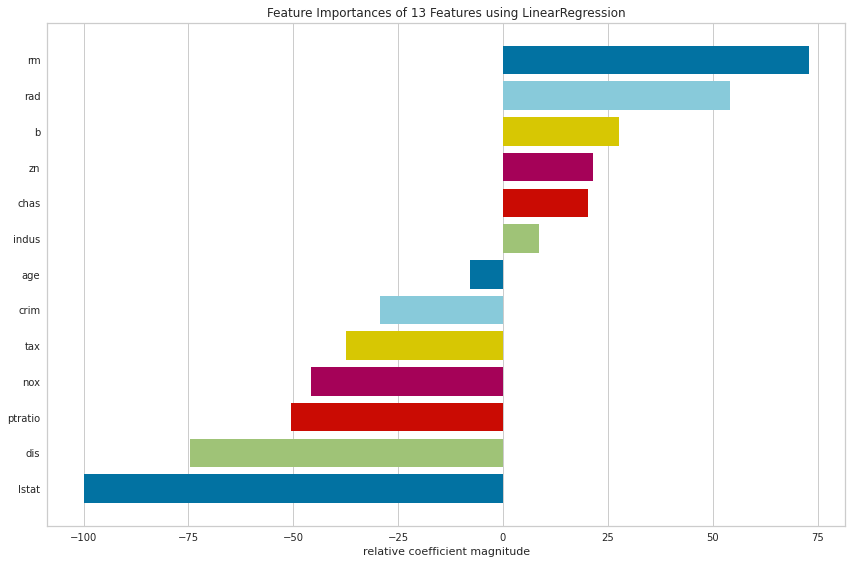

In [24]:
from yellowbrick.features import FeatureImportances

fig, ax = plt.subplots(figsize=(12, 8))
fi_viz = FeatureImportances(lrs, labels=X.columns)
fi_viz.fit(Xs_train, ys_train.values.ravel())
fi_viz.poof()
fig.savefig("images/regression_linear_regression.png", dpi=300)

---
<a id='svm'></a>

## SVMs
[Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html#regression) can perform regression as well.

SVMs have the following properties:
- **Runtime efficiency:** The scikit-learn implementation is O(n⁴), so it can be hard to scale to large sizes. Using a linear kernel or the LinearSVR model can improve the runtime performance at perhaps the cost of accuracy. Upping the cache_size parameter can bring that down to O(n³).
- **Preprocess data:** The algorithm is not scale invariant, so standardizing the data is highly recommended.
- **Prevent overfitting:** The C (penalty parameter) controls regularization. A smaller value allows for a smaller margin in the hyperplane. A higher value for gamma will tend to overfit the training data. The LinearSVR model supports a loss and penalty parameter for regularization. The epsilon parameter can be raised (with 0 you should expect overfitting).
- **Interpret results:** Inspect .support_vectors_, though these are hard to interpret. With linear kernels, you can inspect .coef_.

In [25]:
from sklearn.svm import SVR

svr = SVR(kernel='linear')
svr.fit(Xs_train, ys_train.values.ravel()) 

SVR(kernel='linear')

In [26]:
svr.score(Xs_test, ys_test)

0.6653033556496883

In [27]:
# Support vector indices
svr.support_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  41,  42,  43,  44,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
       174, 175, 176, 178, 179, 180, 181, 182, 183, 184, 185, 18

In [28]:
# Support vectors
svr.support_vectors_

array([[-0.41704368, -0.48772236, -1.30687771, ...,  0.1130321 ,
         0.41057102, -1.04332233],
       [-0.40520503, -0.48772236, -0.16440754, ..., -0.30309415,
         0.40158024, -0.08593539],
       [-0.40056872, -0.48772236, -0.61672651, ..., -0.2568579 ,
         0.44105193, -0.34245342],
       ...,
       [-0.41877066,  2.94584308, -1.3316823 , ..., -0.67298414,
         0.37570436, -0.93398678],
       [ 0.87825441, -0.48772236,  1.01599907, ...,  0.80657583,
        -2.70626713,  1.48821619],
       [-0.39389588, -0.48772236, -0.37597609, ...,  1.13022958,
        -3.13442533, -0.28358043]])

In [29]:
# Coefficients (for linear) kernel
svr.coef_

array([[-1.1795387 ,  0.78213112,  0.37770481,  0.31476111, -0.76960506,
         4.07443944, -1.18001174, -2.18147578,  0.51212621, -0.73467713,
        -1.44119117,  1.15971067, -2.40831092]])

In [30]:
# Constant for decision function
svr.intercept_

array([21.64675833])

---
<a id='kn'></a>

## K-Nearest Neighbor
The [KNN](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-regression) model also supports regression by finding k neighbor targets to the sample for which you want to predict. For regression, this model averages the targets together to determine a prediction.

Nearest neighbor models have the following properties:
- **Runtime efficiency:** Training runtime is O(1), but there is a trade-off as the sample data needs to be stored. Testing runtime is O(Nd), where N is the number of training examples and d is dimensionality.
- **Preprocess data:** Yes, distance-based calculations perform better when standardized.
- **Prevent overfitting:** Raise n_neighbors. Change p for L1 or L2 metric.
- **Interpret results:** Interpret the k-nearest neighbors to the sample (using the .kneighbors method). Those neighbors (if you can explain them) explain your result.

In [31]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=5, n_jobs=-1)
knr.fit(Xs_train, ys_train.values.ravel())

KNeighborsRegressor(n_jobs=-1)

In [32]:
knr.score(Xs_test, ys_test)

0.7476242635592416

---
<a id='dt'></a>

## Decision Tree
[Decision trees](https://scikit-learn.org/stable/modules/tree.html#regression) support classification and regression. At each level of the tree, various splits on features are evaluated. The split that will produce the lowest error (`impurity`) is chosen. The `criterion` parameter can be adjusted to determine the metric for impurity.

Decision trees have the following properties:
- **Runtime efficiency:** For creation, loop over each of the m features we have to sort all n samples: O(mn log n). For predicting, you walk the tree: O(height).
- **Preprocess data:** Scaling not necessary. Need to get rid of missing values and convert to numeric.
- **Prevent overfitting:** Set max_depth to a lower number, raise min_impurity_decrease.
- **Interpret results:** Can step through the tree of choices. Because there are steps, a tree is bad at dealing with linear relationships (a small change in the values of a feature can cause a completely different tree to be formed). The tree is also highly dependent on the training data. A small change can change the whole tree.

In [33]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(Xs_train, ys_train.values.ravel())

DecisionTreeRegressor(random_state=42)

In [34]:
dtr.score(Xs_test, ys_test)

0.8444833592340152

In [35]:
import pydotplus

from io import StringIO
from sklearn.tree import export_graphviz

dot_data = StringIO()
export_graphviz(dtr, out_file=dot_data, feature_names=X.columns, filled=True,)

g = pydotplus.graph_from_dot_data(dot_data.getvalue())
g.write_png("images/regression_decision_tree.png")

True

In [36]:
from IPython.display import Image
Image(g.create_png())

This plot was a little wide. On a computer you can zoom in on portions of it. You can also limit the depth of the chart. (It turns out that the most important features are typically near the top of the tree.) We will use the` max_depth` parameter to do this.

In [37]:
dot_data = StringIO()
export_graphviz(dtr, out_file=dot_data, feature_names=X.columns, max_depth=2, filled=True,)

g = pydotplus.graph_from_dot_data(dot_data.getvalue())
g.write_png("images/regression_decision_tree2.png")

True

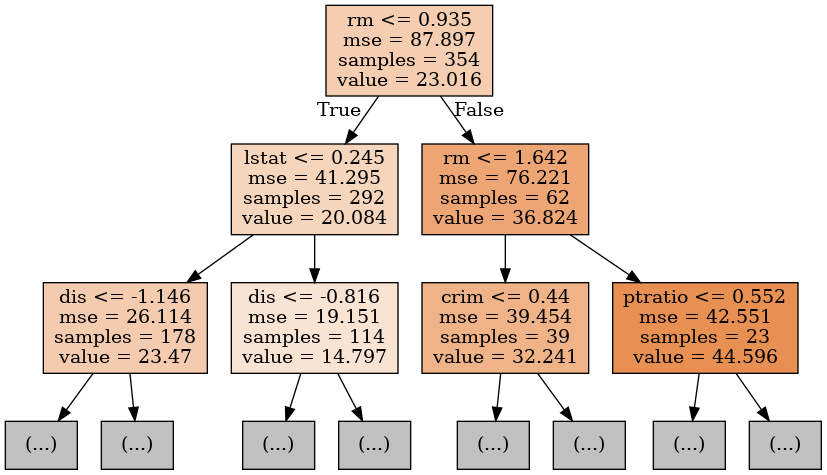

In [38]:
from IPython.display import Image
Image(g.create_png())

We can also use the dtreeviz package to view a scatter plot at each of the nodes of the tree. We will use a tree limited to a `depth` of two so we can see the details.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


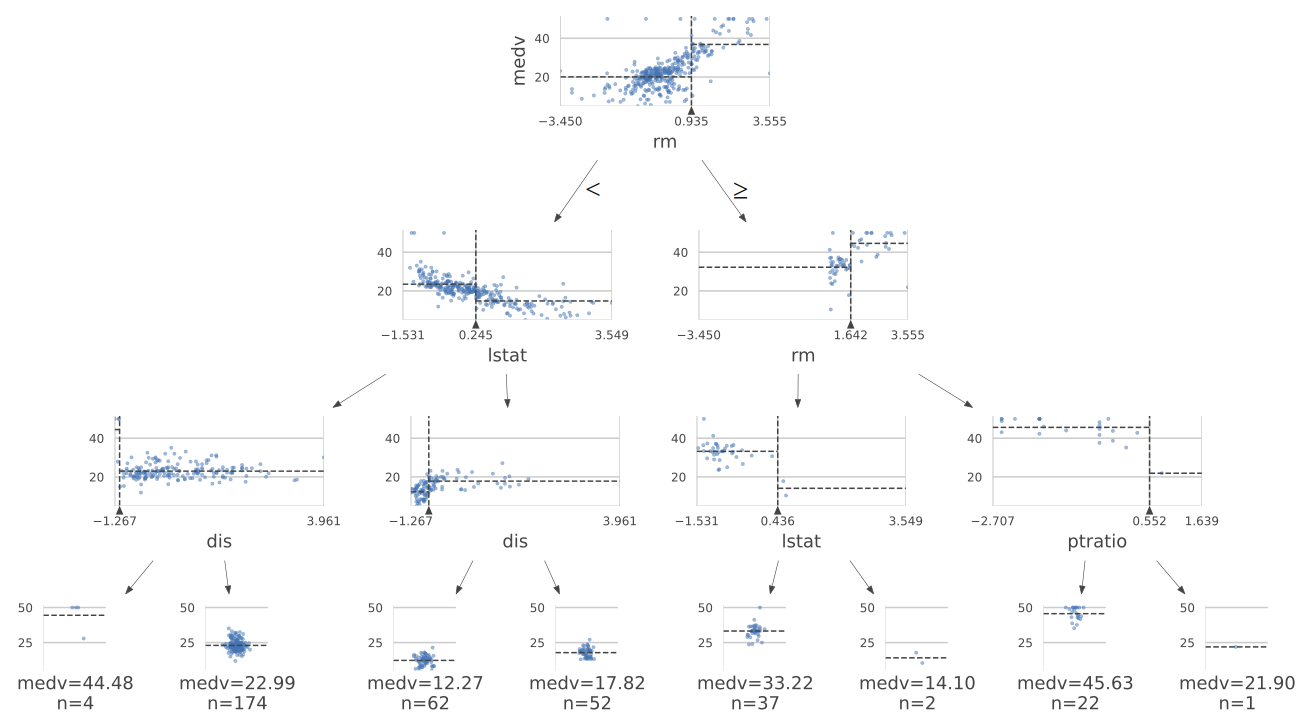

In [39]:
from dtreeviz.trees import *

dtr3 = DecisionTreeRegressor(max_depth=3)
dtr3.fit(Xs_train, ys_train)
viz = dtreeviz(dtr3, Xs_train.to_numpy(), ys_train.to_numpy(), target_name="medv", feature_names=X.columns, scale=2,)
viz

In [40]:
regr = tree.DecisionTreeRegressor(max_depth=2)
boston = load_boston()
regr.fit(boston.data, boston.target)

viz = dtreeviz(regr,
               boston.data,
               boston.target,
               target_name='price',
               feature_names=boston.feature_names)
              
viz

NameError: name 'load_boston' is not defined

In [41]:
Xs_train.to_numpy()

array([[-0.41704368, -0.48772236, -1.30687771, ...,  0.1130321 ,
         0.41057102, -1.04332233],
       [-0.40520503, -0.48772236, -0.16440754, ..., -0.30309415,
         0.40158024, -0.08593539],
       [-0.40056872, -0.48772236, -0.61672651, ..., -0.2568579 ,
         0.44105193, -0.34245342],
       ...,
       [-0.41877066,  2.94584308, -1.3316823 , ..., -0.67298414,
         0.37570436, -0.93398678],
       [ 0.87825441, -0.48772236,  1.01599907, ...,  0.80657583,
        -2.70626713,  1.48821619],
       [-0.39389588, -0.48772236, -0.37597609, ...,  1.13022958,
        -3.13442533, -0.28358043]])

In [42]:
# Feature importance
for col, val in sorted(zip(X.columns, dtr.feature_importances_),
                       key=lambda x: x[1],
                       reverse=True,
                      )[:5]:
    print(f"{col:10}{val:10.3f}")

rm             0.576
lstat          0.190
dis            0.110
crim           0.058
ptratio        0.025


---
<a id='rf'></a>

## Random Forest
Decision trees are good because they are explainable, but they have a tendency to overfit. A [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) trades some of the explainability for a model that tends to generalize better. This model can also be used for regression.

Random forests have the following properties:
- **Runtime efficiency:** Need to create j random trees. This can be done in parallel using n_jobs. Complexity for each tree is O(mn log n), where n is the number of samples and m is the number of features. For creation, loop over each of the m features, and sort all n samples: O(mn log n). For predicting, you walk the tree: O(height).
- **Preprocess data:** Not necessary as long as the input is numeric and not missing values.
- **Prevent overfitting:** Add more trees (n_estimators). Use lower max_depth.
- **Interpret results:** Supports feature importance, but we don’t have a single decision tree that we can walk through. Can inspect single trees from the ensemble.

In [43]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=42, n_estimators=1000, n_jobs=-1)
rfr.fit(Xs_train, ys_train.values.ravel())

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

In [44]:
rfr.score(Xs_test, ys_test)

0.8762795090862738

In [45]:
# Feature importance
for col, val in sorted(zip(X.columns, rfr.feature_importances_),
                       key=lambda x: x[1],
                       reverse=True,
                      )[:5]:
    print(f"{col:10}{val:10.3f}")

lstat          0.415
rm             0.402
dis            0.064
crim           0.032
ptratio        0.018


---
<a id='xg'></a>

## XGBoost Regression
The [XGBoost](https://xgboost.readthedocs.io/en/latest/) library also supports regression. It builds a simple decision tree, then “boosts” it by adding subsequent trees. Each tree tries to correct the residuals of the previous output. In practice, this works quite well on structured data.

It has the following properties:
- **Runtime efficiency:** XGBoost is parallelizeable. Use the n_jobs option to indicate the number of CPUs. Use GPU for even better performance.
- **Preprocess data:** No scaling necessary with tree models. Need to encode categorical data. Supports missing data!
- **Prevent overfitting:** The early_stopping_rounds=N parameter can be set to stop training if there is no improvement after N rounds. L1 and L2 regularization are controlled by reg_alpha and reg_lambda, respectively. Higher numbers mean more conservative.
- **Interpret results:** Has feature importance.

In [46]:
import xgboost as xgb

#xgr = xgb.XGBRegressor(random_state=42, booster = 'gblinear', n_jobs=-1)
xgr = xgb.XGBRegressor(random_state=42, booster = 'gbtree', n_jobs=-1)
xgr.fit(Xs_train, ys_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [47]:
xgr.score(Xs_test, ys_test)

0.8712600046855474

In [48]:
xgr.predict(X.iloc[[0]])

array([12.200695], dtype=float32)

In [49]:
# Coefficients for gblinear learners (booster = 'gblinear')
xgr.coef_

AttributeError: Coefficients are not defined for Booster type gbtree

In [50]:
# Intercept for gblinear learners
xgr.intercept_

AttributeError: Intercept (bias) is not defined for Booster type gbtree

In [51]:
# Feature importances for gbtree learners
xgr.feature_importances_

array([0.01608741, 0.00313967, 0.01446396, 0.00320105, 0.01002821,
       0.19327447, 0.01416495, 0.05734036, 0.00761811, 0.02587119,
       0.06298784, 0.00853149, 0.58329135], dtype=float32)

In [52]:
# Feature importance
for col, val in sorted(zip(X.columns, xgr.feature_importances_),
                       key=lambda x: x[1],
                       reverse=True,
                      )[:5]:
    print(f"{col:10}{val:10.3f}")

lstat          0.583
rm             0.193
ptratio        0.063
dis            0.057
tax            0.026


XGBoost includes plotting facilities for feature importance. Note that the `importance_type` parameter changes the values in this plot. The default is using weight to determine feature importance.

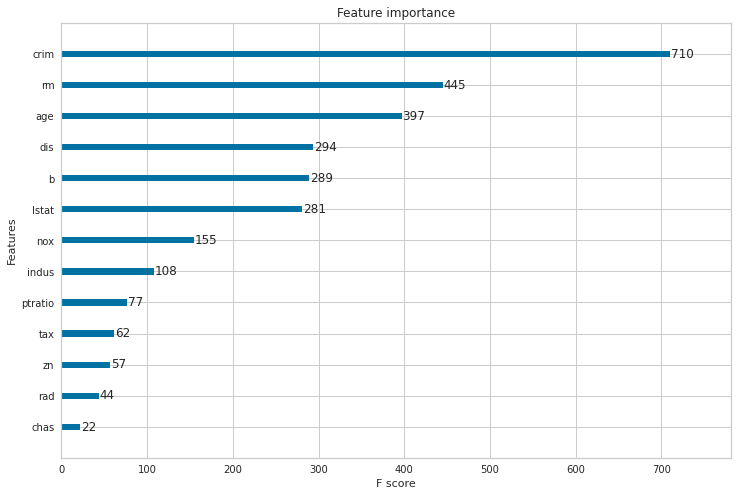

In [53]:
fig, ax = plt.subplots(figsize=(12, 8))
xgb.plot_importance(xgr, ax=ax)
fig.savefig("images/regression_xgboost.png", dpi=300)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


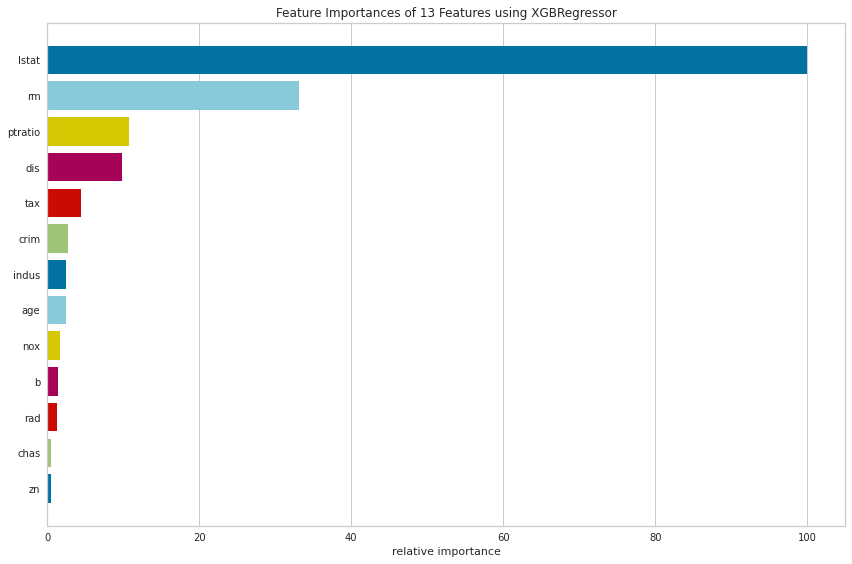

In [54]:
# Using Yellowbrick to plot feature importances (it will normalize the feature_importances_ attribute)
fig, ax = plt.subplots(figsize=(12, 8))
fi_viz = FeatureImportances(xgr)
fi_viz.fit(Xs_train, ys_train)
fi_viz.poof()
fig.savefig("images/regression_xgboost2.png", dpi=300)

XGBoost provides both a textual representation of the trees and a graphical one.

In [55]:
booster = xgr.get_booster()
print(booster.get_dump()[0])

0:[lstat<-0.671160936] yes=1,no=2,missing=1
	1:[rm<1.64172769] yes=3,no=4,missing=3
		3:[rm<0.52978158] yes=7,no=8,missing=7
			7:leaf=7.27536583
			8:leaf=9.32700062
		4:[crim<-0.101394668] yes=9,no=10,missing=9
			9:leaf=12.9495659
			10:leaf=3.21000004
	2:[lstat<0.481067568] yes=5,no=6,missing=5
		5:[b<-3.38742781] yes=11,no=12,missing=11
			11:leaf=2.59500003
			12:[lstat<-0.6676566] yes=15,no=16,missing=15
				15:leaf=1.71000004
				16:leaf=6.37612295
		6:[dis<-0.881830096] yes=13,no=14,missing=13
			13:[crim<0.728088737] yes=17,no=18,missing=17
				17:leaf=3.65125012
				18:[nox<1.0392338] yes=21,no=22,missing=21
					21:leaf=3.31333327
					22:leaf=2.14058828
			14:[b<-0.2544173] yes=19,no=20,missing=19
				19:leaf=3.77684236
				20:leaf=5.19964314



The leaf values can be interpreted as the sum of the base_score and the leaf. To validate this, call `.predict` with the `ntree_limit=1` parameter to limit the model to using the result of the first tree.

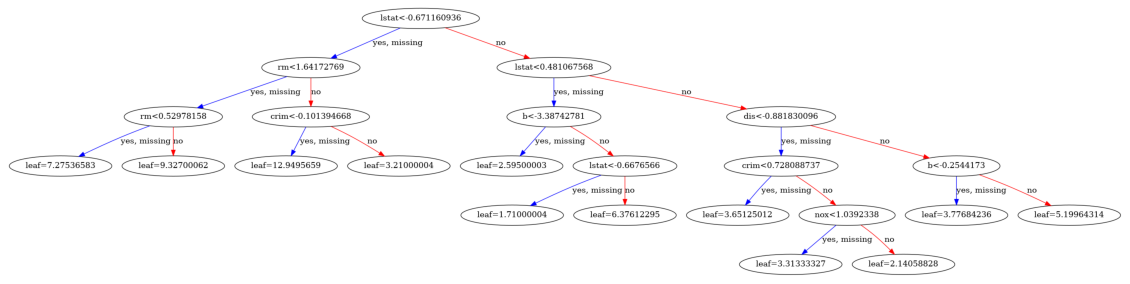

In [56]:
fig, ax = plt.subplots(figsize=(20, 12))
xgb.plot_tree(xgr, ax=ax, num_trees=0)
fig.savefig("images/regression_xgboost3.png", dpi=300)

---
<a id='lgbm'></a>

## LightGBM Regression
The gradient boosting tree library, [LightGBM](https://lightgbm.readthedocs.io/en/latest/), also supports regression. It can be faster than XGBoost for creating trees due to the sampling mechanism used to determine node splits.

Also, remember that it grows trees depth first, so limiting depth may harm the model. It has the following properties:
- **Runtime efficiency:** Can take advantage of multiple CPUs. By using binning, can be 15 times faster than XGBoost.
- **Preprocess data:** Has some support for encoding categorical columns as integers (or pandas Categorical type), but AUC appears to suffer compared to one-hot encoding.
- **Prevent overfitting:** Lower num_leaves. Increase min_data_in_leaf. Use min_gain_to_split with lambda_l1 or lambda_l2.
- **Interpret results:** Feature importance is available. Individual trees are weak and tend to be hard to interpret.

In [57]:
import lightgbm as lgb

lgr = lgb.LGBMRegressor(random_state=42, n_jobs=-1)
lgr.fit(Xs_train, ys_train)

LGBMRegressor(random_state=42)

In [58]:
lgr.score(Xs_test, ys_test)

0.8424447756187686

In [59]:
lgr.predict(X.iloc[[0]])

array([29.43840064])

LightGBM supports feature importance. The `importance_type` parameter determines how this is calculated (the default is based on how many times a feature was used).

In [60]:
# Feature importance
for col, val in sorted(zip(X.columns, lgr.feature_importances_),
                       key=lambda x: x[1],
                       reverse=True,
                      )[:5]:
    print(f"{col:10}{val:10.3f}")

lstat        233.000
rm           195.000
dis          177.000
crim         134.000
age          125.000


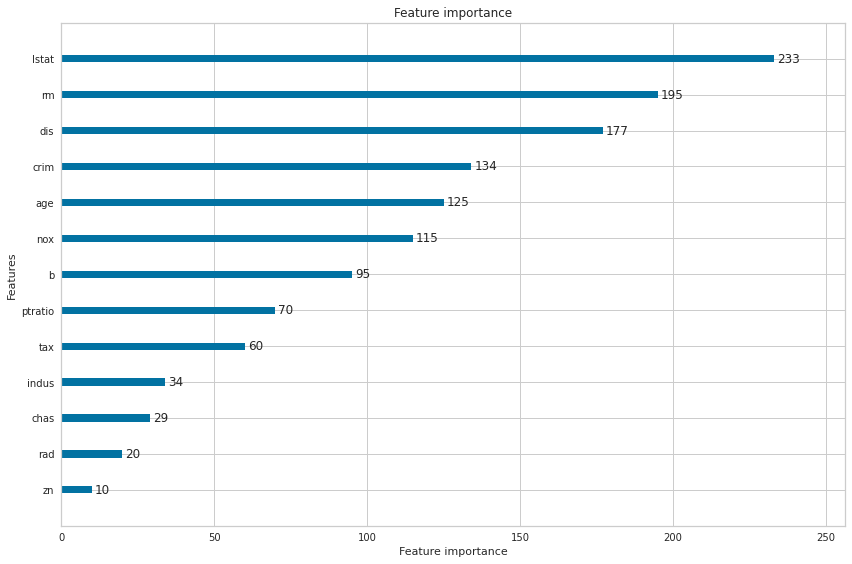

In [61]:
# Feature importance plot showing how many times a feature is used
fig, ax = plt.subplots(figsize=(12, 8))
lgb.plot_importance(lgr, ax=ax)
fig.tight_layout()
fig.savefig("images/regression_lgbm.png", dpi=300)

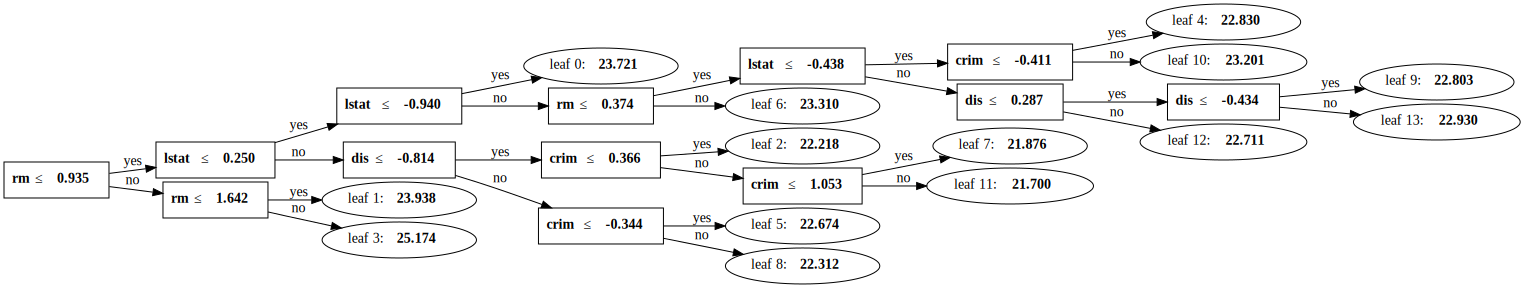

In [62]:
lgb.create_tree_digraph(lgr)

---
<a id='ex1'></a>

## Example - Simple Linear Regression with scikit-learn

In [63]:
import numpy as np
from sklearn.linear_model import LinearRegression

You have two arrays: the input x and output y. You should call `.reshape()` on x because this array is required to be two-dimensional, or to be more precise, to have one column and as many rows as necessary. That’s exactly what the argument (-1, 1) of .reshape() specifies.

In [64]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])
print("x:", x, x.shape)
print("y:", y, y.shape)

x: [[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]] (6, 1)
y: [ 5 20 14 32 22 38] (6,)


With .fit(), you calculate the optimal values of the weights 𝑏₀ and 𝑏₁, using the existing input and output (x and y) as the arguments. In other words, .fit() `fits the model`.

In [65]:
model = LinearRegression(fit_intercept=True, n_jobs=-1)
model.fit(x, y)

LinearRegression(n_jobs=-1)

When you’re applying .score(), the arguments are also the predictor x and regressor y, and the return value is 𝑅².

In [66]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.7158756137479542


The attributes of model are .intercept_, which represents the coefficient, 𝑏₀ and .coef_, which represents 𝑏₁. You can notice that .intercept_ is a scalar, while .coef_ is an array.

In [67]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 5.633333333333329
slope: [0.54]


---
<a id='ex2'></a>

## Example - Simple and Multiple Linear Regression with scikit-learn

In [68]:
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix

def rmse(y_test, y_pred): return sqrt(np.square(np.subtract(y_test, y_pred)).mean())
def rmse_std(y_test, y_pred): return sqrt(np.square(np.subtract(y_test, y_pred)).std())
def mae(y_test, y_pred): return abs(y_test - y_pred).mean()
def mae_std(y_test, y_pred): return abs(y_test - y_pred).std()
def r2(y_test, y_pred): return r2_score(y_test, y_pred) 

# Pearson Correlation Coefficient
def PCC(y_test, y_pred): return round(np.corrcoef(y_test.ravel(), y_pred.ravel())[0][1], 2)

scoring_reg = {
    "RMSE": make_scorer(rmse),
    "MAE": make_scorer(mae),
    "R2": make_scorer(r2),
    "PCC" : make_scorer(PCC), # Pearson Correlation Coefficient
}

In [69]:
import numpy as np
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate

#from constants import (
#    RANDOM_STATE,
#    TARGET_FEATURE_NAME,
#    RESULTS_COLS,
#)

RANDOM_STATE = 42
TARGET_FEATURE_NAME = ''
RESULTS_COLS = []


def check_linear_regression_performance(data: pd.DataFrame, features: list, target: str, test_size, random_state: int, n_splits: int, n_repeats: int):
    """
    data: dataframe including columns specified in the features and target arguments
    features: list of data columns treated as input
    target: target feature name
    test_size:
    random_state:
    n_splits:
    return: dataframe with results
    """
    y = data[[TARGET_FEATURE_NAME]]
    #X = data.drop(columns=[TARGET_FEATURE_NAME])
    #X = data[features]
    
    results_df = pd.DataFrame(columns=RESULTS_COLS)
    
    # Find all combinations of input features
    combs = []
    for num in range(0, len(input_features)):
        combs = combs + (list(combinations(input_features, num+1)))
        
    n = -1
    
    # Perform modelling
    for comb in combs:
        X = data[list(comb)]
        
        n = n + 1
        
        model = LinearRegression(fit_intercept=True, n_jobs=-1)
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        
        # Fit on TRAIN
        kf = RepeatedKFold(n_splits=n_splits, random_state=random_state, n_repeats=n_repeats)
        pipeline = Pipeline([('reg', model)])
        cv_results = cross_validate(pipeline, X_train, y_train.values.ravel(), scoring=scoring_reg, cv=kf)
        pipeline.fit(X_train, y_train)
        
        # Build a row with TRAIN CV mean results for a given model
        reg_metrics_for_model = {
                "Dataset": DATASET_RAW_AFTER_EDA_FILE,
                "Approach": comb,
                "Model": 'LinearRegression',
                "RMSE_cv_mean": cv_results['test_RMSE'].mean(),
                "RMSE_cv_std": cv_results['test_RMSE'].std(),
                "MAE_cv_mean": cv_results['test_MAE'].mean(),
                "MAE_cv_std": cv_results['test_MAE'].std(),
                "R2_cv_mean": cv_results['test_R2'].mean(),
                "R2_cv_std": cv_results['test_R2'].std(),
                "PCC_cv_mean": cv_results['test_PCC'].mean(),
                "PCC_cv_std": cv_results['test_PCC'].std(),
                }
        
        # Fit the final model for prediction
        model.fit(X_train, y_train)
        
        # Predict on TEST
        y_pred = model.predict(X_test)

        # Add TEST metrics to the row
        reg_metrics_for_model['RMSE_test'] = rmse(y_test.values, y_pred)
        reg_metrics_for_model['MAE_test'] = mae(y_test.values, y_pred)
        reg_metrics_for_model['R2_test'] = r2(y_test.values, y_pred)
        reg_metrics_for_model['PCC_test'] = PCC(y_test.values, y_pred)
        reg_metrics_for_model['Coefs'] = model.coef_
        reg_metrics_for_model['Intercept'] = model.intercept_
        
        row = pd.DataFrame(columns=RESULTS_COLS).append(reg_metrics_for_model, ignore_index=True)
        results_df = results_df.append(row, ignore_index=True)

        print(10*'-')
        print(f'Combination: {comb}:')
        #r_sq = model.score(X, y)
        #print('coefficient of determination:', r_sq)
        #print('intercept:', model.intercept_)
        #print('slope:', model.coef_)
        
        # Plot predicted vs Actual
        plt.figure(figsize=(15, 15))
        plt.scatter(y_test, y_pred, c="red")
        plt.title(f'Linear: Actual vs. Predicted for {comb}')
        plt.xlabel("Actual")
        plt.ylabel("Predicted")

        perfect_fit = np.arange(0, 250)
        plt.plot(perfect_fit, perfect_fit, c="grey")
        plt.savefig(f'images/line_reg_actual_vs_pred{n}.png')
        plt.show()
        
    return results_df

In [70]:
input_features = [
    'Col1',
    'Col2',
    'Col3',
]

feat_comb_raw_after_eda_results_df = check_linear_regression_performance(
    data=df, 
    features=input_features, 
    target=TARGET_FEATURE_NAME,
    test_size=0.3,
    random_state=RANDOM_STATE,
    n_splits=10,
    n_repeats=10,
)

KeyError: "None of [Index([''], dtype='object')] are in the [columns]"

---
<a id='ex3'></a>

## Example - Simple Polynomial Regression With scikit-learn
Implementing polynomial regression with scikit-learn is very similar to linear regression. There is only one extra step: you need to transform the array of inputs to include non-linear terms such as 𝑥².

Polynomial regression is a special case of linear regression, by the fact that we create some polynomial features before creating a linear regression.

In real-world situations, having a complex model and 𝑅² very close to 1 might also be a sign of `overfitting`.

In [71]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [72]:
X = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])
print("X:", x, x.shape)
print("y:", y, y.shape)

X: [[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]] (6, 1)
y: [15 11  2  8 25 32] (6,)


You need to include 𝑥² (and perhaps other terms) as additional features when implementing polynomial regression. For that reason, you should transform the input array x to contain the additional column(s) with the values of 𝑥² (and eventually more features).

In [73]:
# Degree 2 preprocesses x to 1, x and x^2
# Degree 3 preprocesses x to 1, x, x^2 and x^3
transformer = PolynomialFeatures(degree=2, include_bias=False)
X_poly = transformer.fit_transform(X)
X_poly

array([[   5.,   25.],
       [  15.,  225.],
       [  25.,  625.],
       [  35., 1225.],
       [  45., 2025.],
       [  55., 3025.]])

```
e+.. refers to the position of the decimal place.
E.g
1.0e+00 = 1.0 [ keep the decimal point where it is ]
1.0144e+03 = 1014.4 [ Move the decimal place 3 places to the right ]
1.02900736e+06 = 1029007.36 [ Move the decimal place 6 to places to the right ]
```

In [74]:
transformer = PolynomialFeatures(degree=2, include_bias=False)
X_poly = transformer.fit_transform(X)
X_poly

array([[   5.,   25.],
       [  15.,  225.],
       [  25.,  625.],
       [  35., 1225.],
       [  45., 2025.],
       [  55., 3025.]])

The code above makes the following Conversion:

<img src="images/polynomial_regression.png" style="width: 600px;"/>

If you call PolynomialFeatures with the default parameter `include_bias=True` (or if you just omit it), you’ll obtain the new input array x_ with the additional leftmost column containing only ones. This column corresponds to the intercept. This is how the modified input array looks in this case:

In [75]:
transformer = PolynomialFeatures(degree=2, include_bias=True)
X_poly = transformer.fit_transform(X)
X_poly

array([[1.000e+00, 5.000e+00, 2.500e+01],
       [1.000e+00, 1.500e+01, 2.250e+02],
       [1.000e+00, 2.500e+01, 6.250e+02],
       [1.000e+00, 3.500e+01, 1.225e+03],
       [1.000e+00, 4.500e+01, 2.025e+03],
       [1.000e+00, 5.500e+01, 3.025e+03]])

The intercept is already included with the leftmost column of ones, and you don’t need to include it again when creating the instance of LinearRegression. Thus, you can provide `fit_intercept=False`.

In [76]:
#transformer = PolynomialFeatures(degree=5, include_bias=False)
#X_poly = transformer.fit_transform(X)
#X_poly

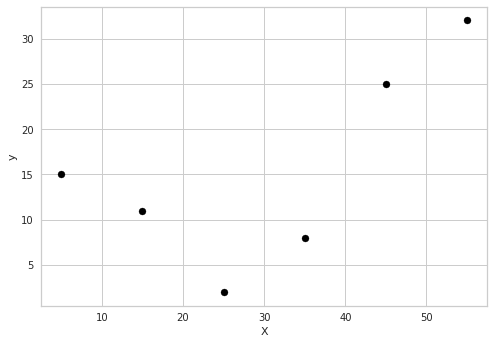

In [77]:
# Produce a scatter graph of Humidity against Pressure
plt.scatter(X, y, c="black")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [78]:
model = LinearRegression(fit_intercept=True, n_jobs=-1)
model.fit(X_poly, y)

LinearRegression(n_jobs=-1)

In [79]:
r_sq = model.score(X_poly, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8908516262498563


In [80]:
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)

intercept: 21.372321428571432
coefficients: [ 0.         -1.32357143  0.02839286]


In [81]:
model.intercept_, model.coef_
# y-hat = 21.37232142857144 - 1.32357143*x + 0.02839286*x^2

(21.372321428571432, array([ 0.        , -1.32357143,  0.02839286]))

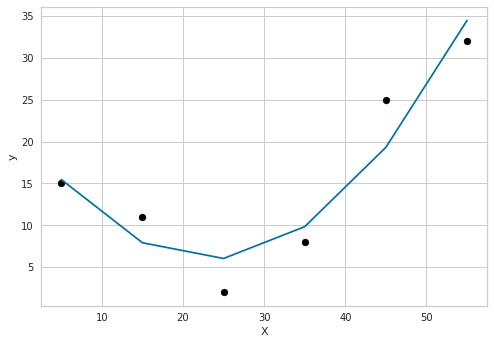

In [82]:
y_pred = model.predict(X_poly)

plt.scatter(X, y, c="black")
plt.xlabel("X")
plt.ylabel("y")
plt.plot(X, y_pred)
plt.show()

In [83]:
# Predict y_hat for x = -10
# Tranform -10 to 1, -10, -10^2 suitable for input, using 
# pre_process.fit_transform
y_new = model.predict(transformer.fit_transform([[-10]]))
y_new

array([37.44732143])

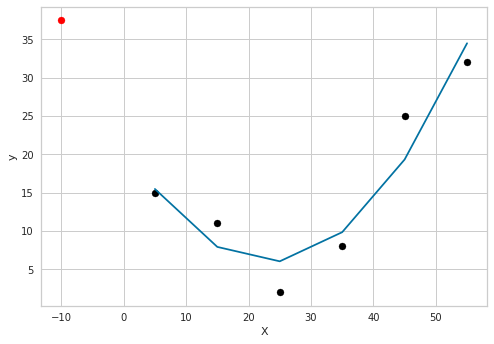

In [84]:
plt.scatter(-10, y_new, c="red")
plt.scatter(X, y, c="black")
plt.xlabel("X")
plt.ylabel("y")
plt.plot(X, y_pred)
plt.show()

In [85]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_pred)

11.305952380952391

---
<a id='ex4'></a>

## Problem with scikit-learn higher order polynomials (Polynomial Regression vs. Polynomial Interpolation)
From: https://towardsdatascience.com/polynomial-regression-with-scikit-learn-what-you-should-know-bed9d3296f2

Scikit learn’s polynomial regression pipeline (with or without scaling), should be equivalent to numpy’s polyfit, but `the difference in terms of big number handling can create different results`. Both models uses Least Squares, but the equation on which these Least Squares are used is completely different. polyfit applies it on the vandemonde matrix while the linear regression does not.

See the differentce for degres 5 and 9.

In [86]:
# degree = 5 # -> Sklearn and np.polyfit show the same results (see plots)
degree = 9 # -> Sklearn cannot handle big numbers properly (shows degree=5) but np.polyfit can

In [87]:
import pandas as pd

xdic = {'X': {11: 300, 12: 170, 13: 288, 14: 360, 15: 319, 16: 330, 17: 520, 18: 345, 19: 399, 20: 479}}
ydic = {'y': {11: 305000, 12: 270000, 13: 360000, 14: 370000, 15: 379000, 16: 405000, 17: 407500, 18: 450000, 19: 450000, 20: 485000}}
X = pd.DataFrame.from_dict(xdic)
y = pd.DataFrame.from_dict(ydic)

In [88]:
X

X
11  300
12  170
13  288
14  360
15  319
16  330
17  520
18  345
19  399
20  479

In [89]:
X.sort_index(inplace=True)
X

X
11  300
12  170
13  288
14  360
15  319
16  330
17  520
18  345
19  399
20  479

In [90]:
y.sort_index(inplace=True)
y

y
11  305000
12  270000
13  360000
14  370000
15  379000
16  405000
17  407500
18  450000
19  450000
20  485000

In [91]:
horizontal_stack = pd.concat([
    X,
    y,], axis=1)
horizontal_stack

X       y
11  300  305000
12  170  270000
13  288  360000
14  360  370000
15  319  379000
16  330  405000
17  520  407500
18  345  450000
19  399  450000
20  479  485000

In [92]:
X_ascending = horizontal_stack.sort_values(by=['X'], ascending=True).reset_index()
X_ascending

index    X       y
0     12  170  270000
1     13  288  360000
2     11  300  305000
3     15  319  379000
4     16  330  405000
5     18  345  450000
6     14  360  370000
7     19  399  450000
8     20  479  485000
9     17  520  407500

In [93]:
X_ascending[['X']].values.ravel().reshape(-1, 1)

array([[170],
       [288],
       [300],
       [319],
       [330],
       [345],
       [360],
       [399],
       [479],
       [520]])

In [94]:
X_ascending.y.ravel().reshape(-1, 1)

array([[270000],
       [360000],
       [305000],
       [379000],
       [405000],
       [450000],
       [370000],
       [450000],
       [485000],
       [407500]])

In [95]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

polyreg_pipeline = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg_pipeline.fit(X_ascending[['X']], X_ascending.y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=9)),
                ('linearregression', LinearRegression())])

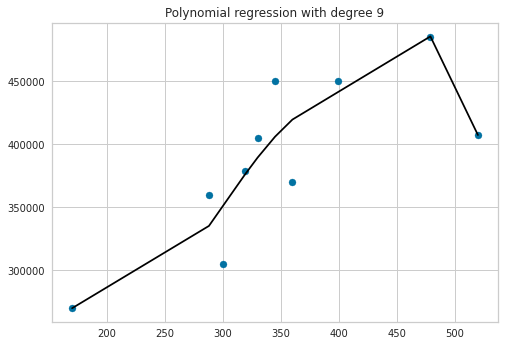

In [96]:
import matplotlib.pyplot as plt

XX = X_ascending[['X']].values.ravel().reshape(-1, 1)
yy = X_ascending.y.ravel().reshape(-1, 1)

plt.figure()
plt.scatter(XX, yy)
plt.plot(XX, polyreg_pipeline.predict(XX), color="black")
plt.title("Polynomial regression with degree " + str(degree))
plt.show()

### Smooth the curve

In [97]:
import numpy as np

X_seq = np.linspace(X.min(), X.max(), 300).reshape(-1,1)
X_seq[:10], X_seq.min(), X_seq.max(), len(X_seq)

(array([[170.        ],
        [171.17056856],
        [172.34113712],
        [173.51170569],
        [174.68227425],
        [175.85284281],
        [177.02341137],
        [178.19397993],
        [179.36454849],
        [180.53511706]]),
 170.0,
 520.0,
 300)

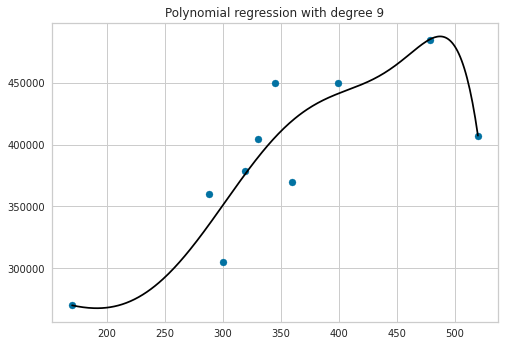

In [98]:
plt.figure()
plt.scatter(X, y)
plt.plot(X_seq, polyreg_pipeline.predict(X_seq), color="black")
plt.title("Polynomial regression with degree " + str(degree))
plt.show()

### Polynomial Interpolation
In numerical analysis, `polynomial interpolation` is the interpolation of a given data set by the polynomial of lowest possible degree that passes through the points of the dataset.

With `np.polyfit`, it is possible to choose the degree of the polynomial and we are doing `polynomial regression` with it. And the degree 9, chosen by the user, is the special case of `polynomial interpolation`. And it is reassuring because the linear regression tries to minimize the squared error. And we know that if there are 10 points, and we try to find a polynomial of degree 9, then the error can be 0 (can’t be lower!) because of the `theorem of polynomial interpolation`.

In [99]:
XXX = XX.flatten()
XXX

array([170, 288, 300, 319, 330, 345, 360, 399, 479, 520])

In [100]:
coefs = np.polyfit(x=XXX, y=yy, deg=degree)
coefs

array([[ 1.64533088e-11],
       [-5.21768680e-08],
       [ 7.28270145e-05],
       [-5.87068175e-02],
       [ 3.01101951e+01],
       [-1.01848104e+04],
       [ 2.27048261e+06],
       [-3.21379376e+08],
       [ 2.61762269e+10],
       [-9.33088414e+11]])

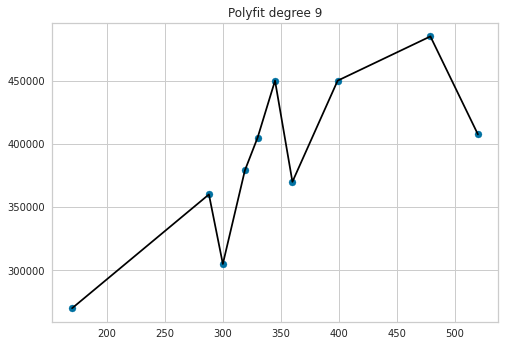

In [101]:
plt.figure()
plt.plot(XX, np.polyval(coefs, XX), color="black")
plt.title("Polyfit degree " + str(degree))
plt.scatter(XX, yy)
plt.show()

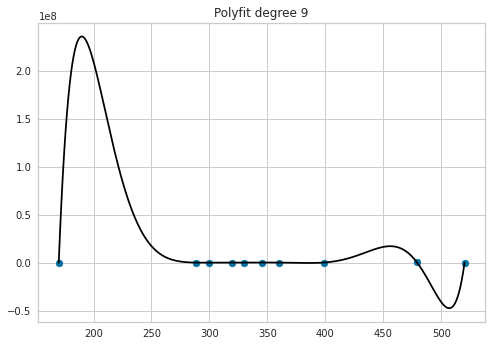

In [102]:
plt.figure()
plt.plot(X_seq, np.polyval(coefs, X_seq), color="black")
plt.title("Polyfit degree " + str(degree))
plt.scatter(XX, yy)
plt.show()

---
<a id='ex5'></a>

## Example - Multiple Polynomial Regression With scikit-learn

In [103]:
# Step 1: Import packages
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Step 2a: Provide data
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

# Step 2b: Transform input data
x_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

# Step 3: Create a model and fit it
model = LinearRegression().fit(x_poly, y)

# Step 4: Get results
r_sq = model.score(x_poly, y)
intercept, coefficients = model.intercept_, model.coef_

# Step 5: Predict
y_pred = model.predict(x_poly)

In [104]:
print('coefficient of determination:', r_sq)
print('intercept:', intercept)
print('coefficients:', coefficients, sep='\n')
print('predicted response:', y_pred, sep='\n')

coefficient of determination: 0.9453701449127822
intercept: 0.8430556452395876
coefficients:
[ 2.44828275  0.16160353 -0.15259677  0.47928683 -0.4641851 ]
predicted response:
[ 0.54047408 11.36340283 16.07809622 15.79139    29.73858619 23.50834636
 39.05631386 41.92339046]


### Predicted vs. Actual

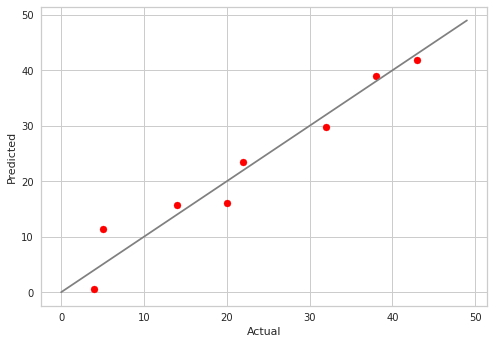

In [105]:
# Predicted vs Actual
plt.scatter(y, y_pred, c="red")
plt.xlabel("Actual")
plt.ylabel("Predicted")

perfect_fit = np.arange(0, 50)
plt.plot(perfect_fit, perfect_fit, c="grey")

plt.show()

---
<a id='ex6'></a>

## Example - Multiple Linear Regression With statsmodels
You can implement linear regression in Python relatively easily by using the package `statsmodels` as well. Typically, this is desirable when there is a need for more detailed results.

In [106]:
import numpy as np
import statsmodels.api as sm

In [107]:
X = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
X, y = np.array(X), np.array(y)

In [108]:
X

array([[ 0,  1],
       [ 5,  1],
       [15,  2],
       [25,  5],
       [35, 11],
       [45, 15],
       [55, 34],
       [60, 35]])

In [109]:
y

array([ 4,  5, 20, 14, 32, 22, 38, 43])

You need to add the column of ones to the inputs if you want statsmodels to calculate the intercept 𝑏₀. It doesn’t takes 𝑏₀ into account by default. `add_constant()` takes the input array x as an argument and returns a new array with the column of ones inserted at the beginning.

In [110]:
X = sm.add_constant(X)
X

array([[ 1.,  0.,  1.],
       [ 1.,  5.,  1.],
       [ 1., 15.,  2.],
       [ 1., 25.,  5.],
       [ 1., 35., 11.],
       [ 1., 45., 15.],
       [ 1., 55., 34.],
       [ 1., 60., 35.]])

You can see that the modified x has three columns: the first column of ones (corresponding to 𝑏₀ and replacing the intercept) as well as two columns of the original features.

The `regression model based on ordinary least squares` is an instance of the class `statsmodels.regression.linear_model.OLS`. You should be careful here! Please, notice that **the first argument is the output, followed with the input**. See: https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html

In [111]:
model = sm.OLS(y, X)
results = model.fit()

In [112]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Sun, 04 Apr 2021   Prob (F-statistic):            0.00713
Time:                        20:18:10   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.2

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In this particular case, you might obtain the warning related to kurtosistest. This is due to the small number of observations provided.

In [113]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

coefficient of determination: 0.8615939258756776
adjusted coefficient of determination: 0.8062314962259487
regression coefficients: [5.52257928 0.44706965 0.25502548]


Adjusted 𝑅² (𝑅² corrected according to the number of input features), more: https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html

In [114]:
# Historical data
print('predicted response:', results.fittedvalues, sep='\n')
print('predicted response:', results.predict(X), sep='\n')

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]
predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [115]:
# New data
x_new = sm.add_constant(np.arange(10).reshape((-1, 2)))
print(x_new)

y_new = results.predict(x_new)
print(y_new)

[[1. 0. 1.]
 [1. 2. 3.]
 [1. 4. 5.]
 [1. 6. 7.]
 [1. 8. 9.]]
[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


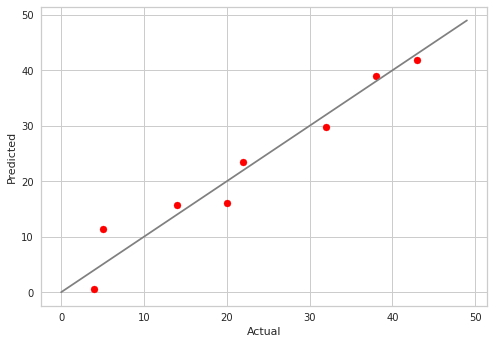

In [116]:
# Predicted vs Actual
plt.scatter(y, y_pred, c="red")
plt.xlabel("Actual")
plt.ylabel("Predicted")

perfect_fit = np.arange(0, 50)
plt.plot(perfect_fit, perfect_fit, c="grey")

plt.show()

---
<a id='ex7'></a>

## Polynomial Interpolation Example with scikit-learn
From: https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html#sphx-glr-auto-examples-linear-model-plot-polynomial-interpolation-py

This example demonstrates how to approximate a function with a polynomial of degree n_degree by using ridge regression. Concretely, from n_samples 1d points, it suffices to build the Vandermonde matrix, which is n_samples x n_degree+1 and has the following form:

[[1, x_1, x_1 ** 2, x_1 ** 3, …],
[1, x_2, x_2 ** 2, x_2 ** 3, …], …]

Intuitively, this matrix can be interpreted as a matrix of pseudo features (the points raised to some power). The matrix is akin to (but different from) the matrix induced by a polynomial kernel.

This example shows that you can do non-linear regression with a linear model, using a pipeline to add non-linear features. Kernel methods extend this idea and can induce very high (even infinite) dimensional feature spaces.

In [117]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [118]:
def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)

In [119]:
# generate points used to plot
x_plot = np.linspace(0, 10, 100)
x_plot

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [120]:
# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
x

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [121]:
rng = np.random.RandomState(0)
rng

RandomState(MT19937) at 0x7F10D8100840

In [122]:
rng.shuffle(x)
x

array([ 2.62626263,  8.68686869,  0.2020202 ,  5.55555556,  7.57575758,
        9.39393939,  1.61616162,  7.37373737,  5.45454545,  9.5959596 ,
        5.35353535,  9.29292929,  7.87878788,  1.31313131,  0.70707071,
        3.03030303,  2.22222222,  2.42424242,  3.33333333,  0.80808081,
        4.34343434,  6.26262626,  0.3030303 ,  7.17171717,  4.54545455,
        4.84848485,  0.60606061, 10.        ,  8.28282828,  7.67676768,
        6.06060606,  8.08080808,  9.09090909,  6.86868687,  5.15151515,
        2.72727273,  1.81818182,  5.65656566,  6.36363636,  7.47474747,
        0.1010101 ,  6.16161616,  4.24242424,  4.14141414,  0.4040404 ,
        1.51515152,  1.71717172,  4.04040404,  3.83838384,  0.50505051,
        9.19191919,  5.95959596,  0.        ,  3.43434343,  2.82828283,
        5.05050505,  1.11111111,  3.53535354,  2.32323232,  5.25252525,
        1.01010101,  3.13131313,  6.66666667,  5.75757576,  7.97979798,
        8.58585859,  3.23232323,  8.48484848,  1.41414141,  8.98

In [123]:
x = np.sort(x[:20])
x

array([0.2020202 , 0.70707071, 0.80808081, 1.31313131, 1.61616162,
       2.22222222, 2.42424242, 2.62626263, 3.03030303, 3.33333333,
       5.35353535, 5.45454545, 5.55555556, 7.37373737, 7.57575758,
       7.87878788, 8.68686869, 9.29292929, 9.39393939, 9.5959596 ])

In [124]:
y = f(x)
y

array([ 0.04053512,  0.45931986,  0.58421217,  1.26978173,  1.61449886,
        1.76715568,  1.59367333,  1.29428011,  0.33654557, -0.63522654,
       -4.2903801 , -4.02006959, -3.69500842,  6.5396357 ,  7.28442965,
        7.8763639 ,  5.84402579,  1.22171343,  0.28964971, -1.63464132])

In [125]:
# create matrix versions of these arrays
X = x[:, np.newaxis]
X

array([[0.2020202 ],
       [0.70707071],
       [0.80808081],
       [1.31313131],
       [1.61616162],
       [2.22222222],
       [2.42424242],
       [2.62626263],
       [3.03030303],
       [3.33333333],
       [5.35353535],
       [5.45454545],
       [5.55555556],
       [7.37373737],
       [7.57575758],
       [7.87878788],
       [8.68686869],
       [9.29292929],
       [9.39393939],
       [9.5959596 ]])

In [126]:
X_plot = x_plot[:, np.newaxis]
X_plot

array([[ 0.        ],
       [ 0.1010101 ],
       [ 0.2020202 ],
       [ 0.3030303 ],
       [ 0.4040404 ],
       [ 0.50505051],
       [ 0.60606061],
       [ 0.70707071],
       [ 0.80808081],
       [ 0.90909091],
       [ 1.01010101],
       [ 1.11111111],
       [ 1.21212121],
       [ 1.31313131],
       [ 1.41414141],
       [ 1.51515152],
       [ 1.61616162],
       [ 1.71717172],
       [ 1.81818182],
       [ 1.91919192],
       [ 2.02020202],
       [ 2.12121212],
       [ 2.22222222],
       [ 2.32323232],
       [ 2.42424242],
       [ 2.52525253],
       [ 2.62626263],
       [ 2.72727273],
       [ 2.82828283],
       [ 2.92929293],
       [ 3.03030303],
       [ 3.13131313],
       [ 3.23232323],
       [ 3.33333333],
       [ 3.43434343],
       [ 3.53535354],
       [ 3.63636364],
       [ 3.73737374],
       [ 3.83838384],
       [ 3.93939394],
       [ 4.04040404],
       [ 4.14141414],
       [ 4.24242424],
       [ 4.34343434],
       [ 4.44444444],
       [ 4

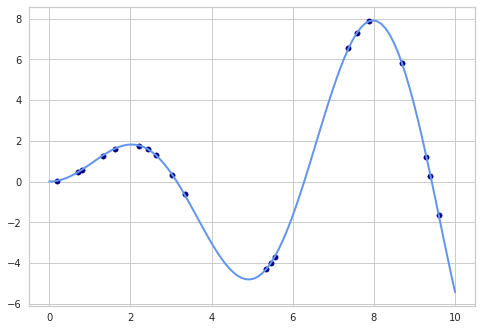

In [127]:
colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

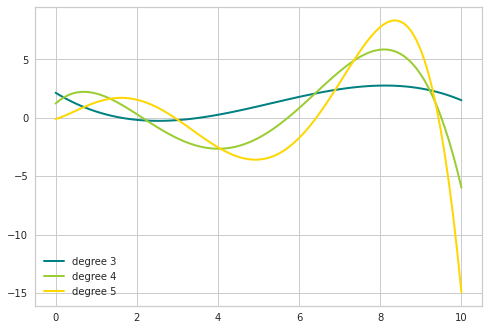

In [128]:
for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw, label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()

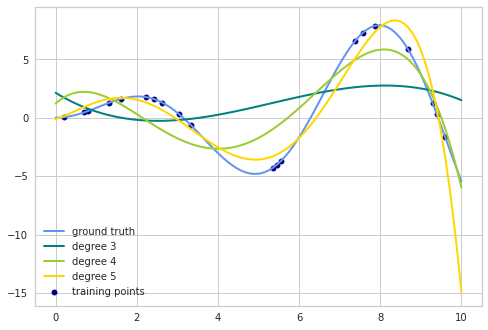

In [129]:
colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw, label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()